## Proyecto: Analisis de datos inmobiliarios

### Ing Robra Abel Maximiliano

### 1. Problema planteado

<b> ¿Qué busca el mercado inmobliario Argentino? </b>

Con el dataset previsto en el proyecto 1 y 2, vamos a generar un modelo que trate de predecir el tiempo que demoraria en venderse una unidad, una vez realizado analizaremos cuales son los factores que mas intervenienen en el modelo, asi sabremos cuales son las caracteristicas que mas influyen en la venta. Para este trabajo vamos a suponer que todos los anuncios fueron finalizados por venta realizada.


### 2. Exploración y transformación de datos

#### Cargamos las librerias necesarias

In [1]:
#Importamos las librerias

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#### Exploramos y transformamos el dataset 

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Con respecto a trabajos anteriores, ahora vamos a utilizar las fechas de inicio y final del anuncio

*start_date - Fecha de alta del aviso

*end_date - Fecha de baja del aviso

Supondremos que este es el tiempo que necesito la unidad para venderse desde que se publico

Describimos los datos y vemos valores nulos

In [3]:
print("El dataset tiene " + str(df.shape[0]) + " filas y "+ str(df.shape[1]) + " columnas ")
df.count().sort_values()

El dataset tiene 146660 filas y 19 columnas 


surface_covered    125046
surface_total      126133
lon                136701
lat                136735
bathrooms          140703
start_date         146660
description        146660
title              146660
currency           146660
price              146660
bedrooms           146660
rooms              146660
l3                 146660
l2                 146660
l1                 146660
created_on         146660
end_date           146660
property_type      146660
operation_type     146660
dtype: int64

Podemos ver que las fecha de inicio y final del anuncio estan sin valores nulos, por lo cual podemos utilizar esta información para crear una nueva columna que contenga el tiempo transcurrido 

Primero crearemos una función que tome los parametros y calcule la diferencia de dias, luego usaremos una función lambda para crear la columna faltante

In [4]:
def f(x, y):
    return(y - x).days

In [5]:
df["start_date"] = df["start_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
df["end_date"] = df["end_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
df['days'] = df.apply(lambda x: f(x['start_date'], x['end_date']), axis=1)

In [6]:
df.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,days
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,67
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,35


Ahora que esa completo el dataset, vamos a explorar la distribución del dato principal

In [7]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,days
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,4.988945e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,1.097772e+06
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,0.000000e+00
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,1.400000e+01
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,4.500000e+01
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,1.420000e+02
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,2.914998e+06


In [8]:
for p in df['property_type'].unique():
    mode = round((df[df['property_type'] == p]['days'].values).mean(), 2)
    max = (df[df['property_type'] == p]['days'].values).max()
    min = (df[df['property_type'] == p]['days'].values).min()
    print("El tipo de departamento {}, la media es {}, el maximo es {} y el minimo es {}".format(p, mode, max, min))

El tipo de departamento Departamento, la media es 427688.42, el maximo es 2914998 y el minimo es 0
El tipo de departamento PH, la media es 223063.33, el maximo es 2914998 y el minimo es 0
El tipo de departamento Casa, la media es 878883.09, el maximo es 2914995 y el minimo es 0
El tipo de departamento Lote, la media es 1315191.59, el maximo es 2914940 y el minimo es 0
El tipo de departamento Casa de campo, la media es 588425.36, el maximo es 2914865 y el minimo es 0
El tipo de departamento Oficina, la media es 987838.47, el maximo es 2914992 y el minimo es 0
El tipo de departamento Otro, la media es 1441781.82, el maximo es 2914996 y el minimo es 1
El tipo de departamento Local comercial, la media es 2538001.27, el maximo es 2914806 y el minimo es 0
El tipo de departamento Cochera, la media es 2273206.44, el maximo es 2914684 y el minimo es 0
El tipo de departamento Depósito, la media es 2430728.31, el maximo es 2914807 y el minimo es 0


Explorando los datos, vemos que hay maximos de casi 3 millones de dias en venderse una unidad, esto es imposible ya que seria mas de 8000 años esta operación, por lo cual deduzco que es un error al completar el dataset. Eliminare aquellos registros que tengan mas de 2M de dias en venderse

In [9]:
df[df['days'] == 2914995]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,days
50420,2019-01-05,9999-12-31,2019-01-05,-34.389736,-58.645316,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,167.0,77.0,299258.0,USD,DESARROLLO PREMIUM - VISTA RIO - NORDELTA - VI...,40% A LA FIRMA DEL BOLETO. FINANCIACIÓN 24 CUO...,Departamento,Venta,2914995
50474,2019-01-05,9999-12-31,2019-01-05,-34.914197,-58.075686,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,5.0,3.0,1.0,800.0,240.0,350000.0,USD,Barrio Las Carolinas casa en venta,Casa a estrenar en Barrio La Carolinas. Tres d...,Casa,Venta,2914995


In [10]:
df_t1 = df[df['days'] <= 2000000]

In [11]:
df_t1.shape

(121559, 20)

In [12]:
df_t1.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,days
count,113290.000000,113284.000000,121559.000000,121559.000000,119036.000000,117205.000000,116086.000000,1.215590e+05,121559.000000
mean,-34.598709,-58.462670,3.102773,2.045682,1.593678,208.637114,109.811933,2.432743e+05,52.781769
std,0.095179,0.139890,1.392244,1.094061,0.882287,1944.213773,884.832643,2.981254e+05,57.342288
min,-35.318457,-59.104646,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,0.000000
25%,-34.619930,-58.498882,2.000000,1.000000,1.000000,52.000000,47.000000,1.150000e+05,13.000000
50%,-34.598334,-58.443017,3.000000,2.000000,1.000000,78.000000,67.000000,1.690000e+05,27.000000
75%,-34.572294,-58.410891,4.000000,3.000000,2.000000,138.000000,107.000000,2.680000e+05,80.000000
max,-34.114280,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,434.000000


In [13]:
for p in df_t1['property_type'].unique():
    mode = round((df_t1[df_t1['property_type'] == p]['days'].values).mean(), 2)
    max = (df_t1[df_t1['property_type'] == p]['days'].values).max()
    min = (df_t1[df_t1['property_type'] == p]['days'].values).min()
    print("El tipo de departamento {}, la media es {}, el maximo es {} y el minimo es {}".format(p, mode, max, min))

El tipo de departamento Departamento, la media es 49.88, el maximo es 430 y el minimo es 0
El tipo de departamento PH, la media es 50.03, el maximo es 421 y el minimo es 0
El tipo de departamento Casa, la media es 71.5, el maximo es 434 y el minimo es 0
El tipo de departamento Lote, la media es 72.01, el maximo es 388 y el minimo es 0
El tipo de departamento Casa de campo, la media es 73.26, el maximo es 388 y el minimo es 0
El tipo de departamento Oficina, la media es 59.19, el maximo es 304 y el minimo es 0
El tipo de departamento Otro, la media es 64.39, el maximo es 281 y el minimo es 1
El tipo de departamento Cochera, la media es 22.58, el maximo es 156 y el minimo es 0
El tipo de departamento Local comercial, la media es 53.26, el maximo es 226 y el minimo es 0
El tipo de departamento Depósito, la media es 21.64, el maximo es 223 y el minimo es 0


Al momento de realizar el dataset habia anuncios no finalizados, por lo que se completo con un valor que luego distorsiono los datos. Al eliminar los registros con muchos dias, vemos un comportamiento mas normal en los tiempos de los anuncios. Como siguiente paso, vamos a trabajar solo con los tipos de propiedad mas representativos del data set, por lo cual veremos que porcentaje de los datos representa cada tipo

In [14]:
for p in df_t1['property_type'].unique():
    porcentaje = round((df_t1[df_t1['property_type'] == p].shape[0])/(df_t1.shape[0]), 2)
    print( "El tipo de propiedad {} ocupa el {} % del dataset".format(p, porcentaje))

El tipo de propiedad Departamento ocupa el 0.75 % del dataset
El tipo de propiedad PH ocupa el 0.11 % del dataset
El tipo de propiedad Casa ocupa el 0.12 % del dataset
El tipo de propiedad Lote ocupa el 0.01 % del dataset
El tipo de propiedad Casa de campo ocupa el 0.0 % del dataset
El tipo de propiedad Oficina ocupa el 0.0 % del dataset
El tipo de propiedad Otro ocupa el 0.0 % del dataset
El tipo de propiedad Cochera ocupa el 0.0 % del dataset
El tipo de propiedad Local comercial ocupa el 0.0 % del dataset
El tipo de propiedad Depósito ocupa el 0.0 % del dataset


Desde este punto solo trabajaremos con departamentos, PH, casa y lotes. Veremos la distribución de la variable de interes por cada tipo 

C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

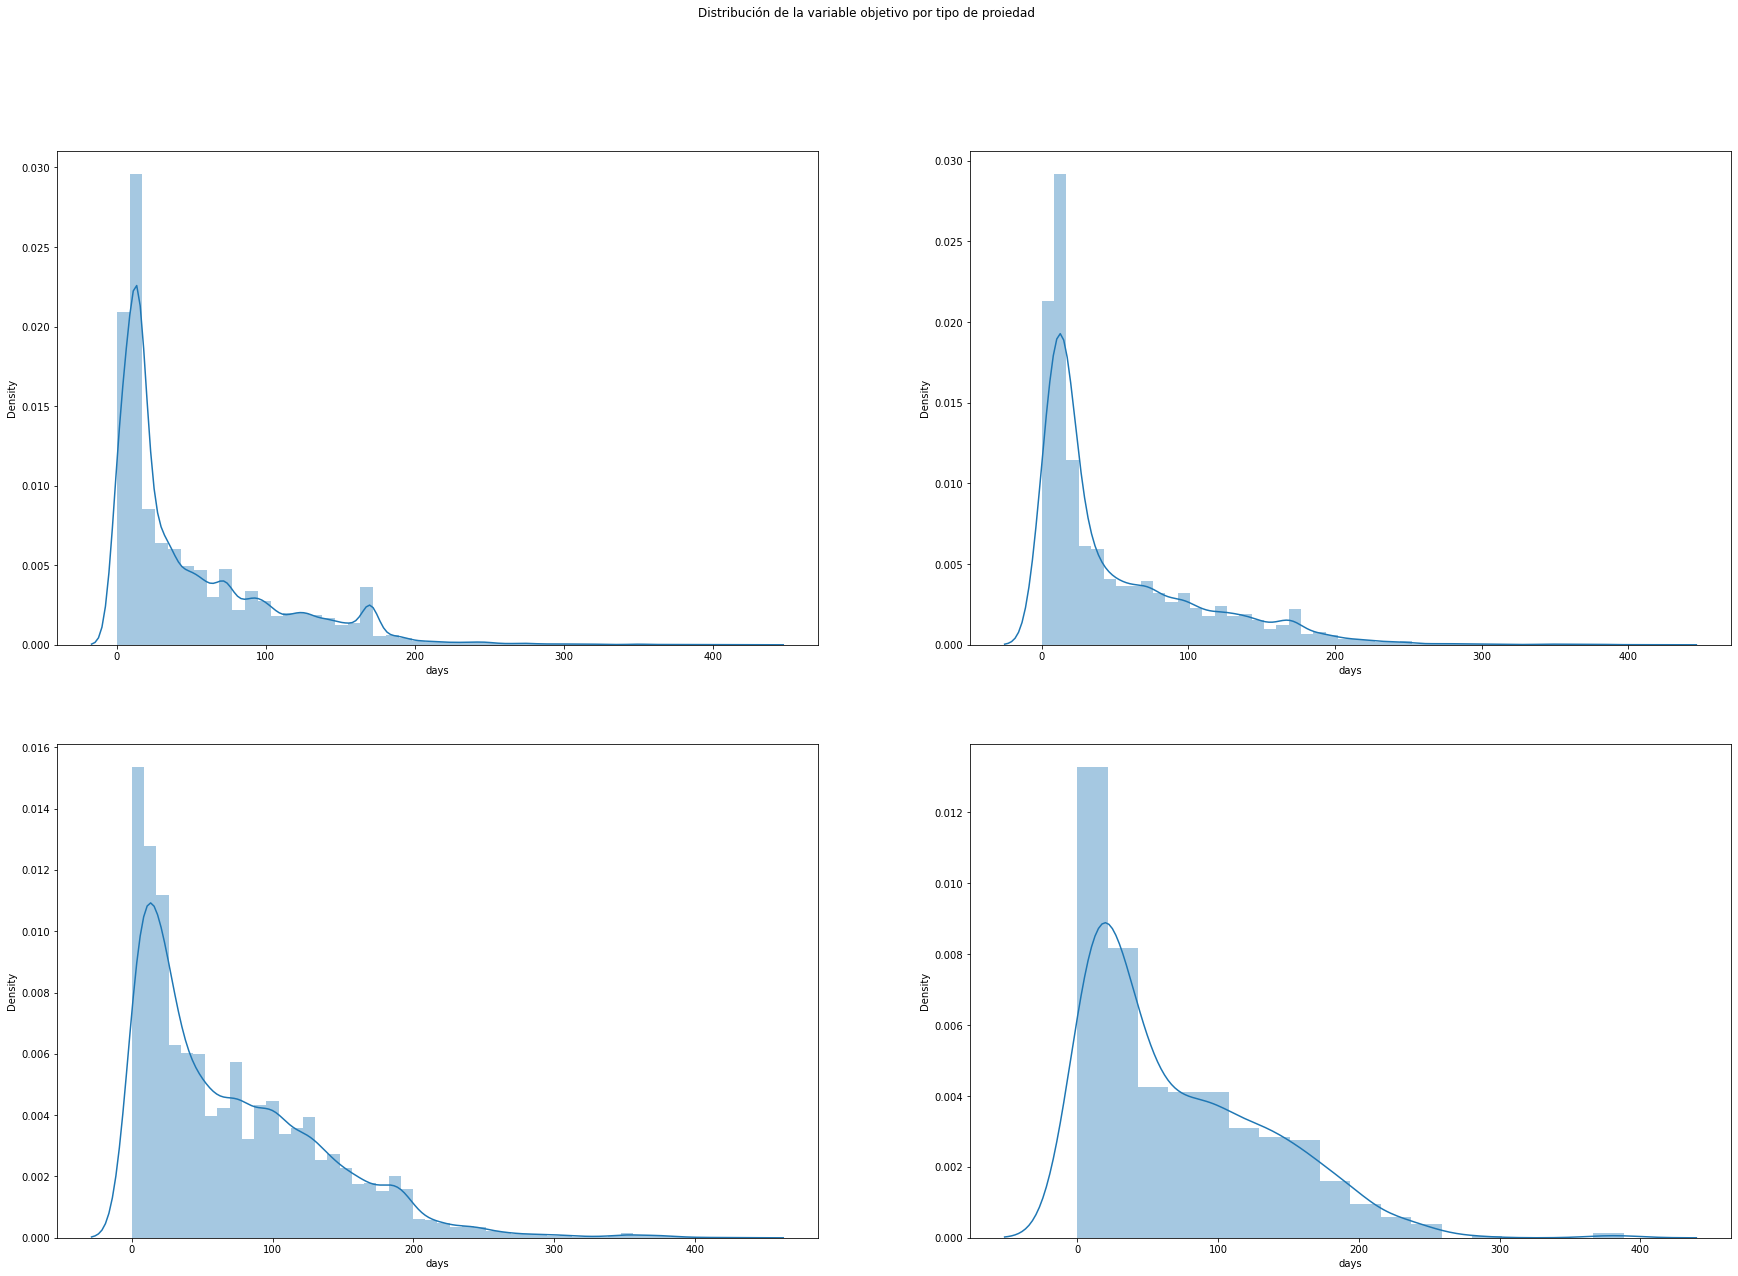

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

fig.suptitle('Distribución de la variable objetivo por tipo de proiedad')

sns.distplot(ax=axes[0, 0], a=df_t1[df_t1['property_type'] == "Departamento"]['days'])
sns.distplot(ax=axes[0, 1], a=df_t1[df_t1['property_type'] == "PH"]['days'])
sns.distplot(ax=axes[1, 0], a=df_t1[df_t1['property_type'] == "Casa"]['days'])
sns.distplot(ax=axes[1, 1], a=df_t1[df_t1['property_type'] == "Lote"]['days'])

plt.show()

El paso siguiente es eliminar las columnas que no necesitaremos, pero antes de hacerlo vamos a crear 2 nuevos datos que pueden ayudar al modelo. El primero es el mes cuando inicia la venta y el segundo es el valor de la propiedad por m2 (tomando la superficie total como superficie de referencia). Estos 2 datos son importantes ya que puede ser un negocio estacionario y el otro puede ser una mejor referencia para el mercado que el precio total de la unidad

In [16]:
fecha_inicial = sorted(df_t1['end_date'].unique())[0]
fecha_final = sorted(df_t1['end_date'].unique(), reverse=True)[0]
print(fecha_inicial)
print(fecha_final)

2019-01-04
2020-03-25


In [17]:
def usdm2(x, y):
    return(round((x/y), 2))

In [18]:
def month(x):
    return(x.month)

In [19]:
df_t2 = df_t1
df_t2["usd/m2"] = df_t2.apply(lambda x: usdm2(x['price'], x['surface_total']), axis=1)
df_t2["month"] = df_t2.apply(lambda x: month(x['start_date']), axis=1)

<ipython-input-19-f0940a673e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t2["usd/m2"] = df_t2.apply(lambda x: usdm2(x['price'], x['surface_total']), axis=1)
<ipython-input-19-f0940a673e26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t2["month"] = df_t2.apply(lambda x: month(x['start_date']), axis=1)


In [20]:
df_t2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,days,usd/m2,month
count,113290.000000,113284.000000,121559.000000,121559.000000,119036.000000,117205.000000,116086.000000,1.215590e+05,121559.000000,117205.000000,121559.000000
mean,-34.598709,-58.462670,3.102773,2.045682,1.593678,208.637114,109.811933,2.432743e+05,52.781769,2385.103437,6.072006
std,0.095179,0.139890,1.392244,1.094061,0.882287,1944.213773,884.832643,2.981254e+05,57.342288,2551.934252,3.403156
min,-35.318457,-59.104646,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,0.000000,0.550000,1.000000
25%,-34.619930,-58.498882,2.000000,1.000000,1.000000,52.000000,47.000000,1.150000e+05,13.000000,1653.850000,3.000000
50%,-34.598334,-58.443017,3.000000,2.000000,1.000000,78.000000,67.000000,1.690000e+05,27.000000,2333.330000,6.000000
75%,-34.572294,-58.410891,4.000000,3.000000,2.000000,138.000000,107.000000,2.680000e+05,80.000000,2975.000000,9.000000
max,-34.114280,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,434.000000,754284.470000,12.000000


In [21]:
df_t2.shape

(121559, 22)

C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

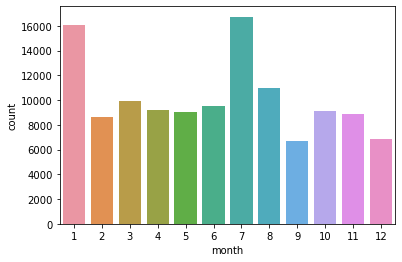

In [22]:
sns.countplot(df_t2['month'])

In [23]:
for month in sorted(df_t2['month'].unique()):
    mean = round(df_t2[df_t2['month'] == month]['days'].mean(), 2)    
    print("Para el mes {} el promedio de tiempo de venta es de {}".format(month, mean))

Para el mes 1 el promedio de tiempo de venta es de 61.21
Para el mes 2 el promedio de tiempo de venta es de 93.63
Para el mes 3 el promedio de tiempo de venta es de 86.75
Para el mes 4 el promedio de tiempo de venta es de 69.42
Para el mes 5 el promedio de tiempo de venta es de 49.59
Para el mes 6 el promedio de tiempo de venta es de 42.94
Para el mes 7 el promedio de tiempo de venta es de 55.17
Para el mes 8 el promedio de tiempo de venta es de 21.57
Para el mes 9 el promedio de tiempo de venta es de 28.66
Para el mes 10 el promedio de tiempo de venta es de 46.89
Para el mes 11 el promedio de tiempo de venta es de 39.85
Para el mes 12 el promedio de tiempo de venta es de 20.2


Analisis de la variable <b>month</b>: Efectivamente existe una relación entre el mes que se inicia la publicaci{on y el tiempo que demora en venderse. Esto se explica ya que en Argentina coincide cerca de los pagos del sueldo complementario anual. Esta nueva variable puede llegar a ser mucho mas determinante que todas las otras

Eliminamos las columnas que no utilizaremos

In [24]:
columnas_descartables = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'description', 'l1', 'operation_type', 'currency', 'bedrooms', 'bathrooms']
df_t3 = df_t2.drop(columns=columnas_descartables)
mascara_Depósito = (df_t3.property_type == "Depósito")
mascara_Cochera = (df_t3.property_type == "Cochera")
mascara_Local = (df_t3.property_type == "Local")
mascara_Otro = (df_t3.property_type == "Otro")
mascara_Oficina = (df_t3.property_type == "Oficina")
mascara_Casa_de_campo = (df_t3.property_type == "Casa de campo")
mascara_Local_comercial = (df_t3.property_type == "Local comercial")

df_t3.drop(df_t3[mascara_Depósito|mascara_Local_comercial|mascara_Cochera|mascara_Local|mascara_Otro|mascara_Oficina|mascara_Casa_de_campo].index, inplace = True)
print("El dataset tiene " + str(df_t3.shape[0]) + " filas y "+ str(df_t3.shape[1]) + " columnas ")

El dataset tiene 120535 filas y 10 columnas 


In [25]:
df_t3.head(2)

,l2,l3,rooms,surface_total,surface_covered,price,property_type,days,usd/m2,month
0,Capital Federal,San Cristobal,7.0,140.0,140.0,153000.0,Departamento,67,1092.86,10
1,Capital Federal,Boedo,2.0,70.0,58.0,159000.0,PH,35,2271.43,10


Hacemos tratemiento de valores nulos y outliers

In [26]:
df_t3.count().sort_values()

surface_covered    115418
surface_total      116414
usd/m2             116414
l2                 120535
l3                 120535
rooms              120535
price              120535
property_type      120535
days               120535
month              120535
dtype: int64

Como son pocos los valores nulos, lo vamos a eliminar

In [27]:
df_t3 = df_t3.dropna()

Ahora vamos a ver graficamente la nueva variable "usd/m2"

<AxesSubplot:xlabel='usd/m2'>

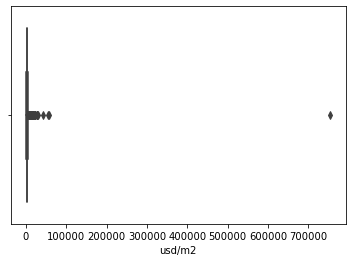

In [28]:
sns.boxplot(x=df_t3["usd/m2"])

Podemos apreciar que esta variable tiene muchos valores atipicos. Trataremos esta variable y, por su relación, tambien estaremos tratando otras variables numeros (superficie y precio) ya que las mismas tienen una relación directa. Para eliminar utilizaremos el rango intercuartílico.

In [29]:
property_type_list = list(set(df_t3['property_type'].values))

for property_type in property_type_list:
    
        # Esta es la forma de calculo Rango Intercuartílico
        
        q25,q75 = np.percentile(df_t3[df_t3.property_type == property_type]['usd/m2'], [25,75])
        iqr = q75 - q25
        minimo = q25 - 1.5*iqr
        maximo = q75 + 1.5*iqr
        mascara_min = (df_t3.property_type == property_type) & (df_t3['usd/m2'] < minimo)
        mascara_max = (df_t3.property_type == property_type) & (df_t3['usd/m2'] > maximo)
        df_t3.drop(df_t3[mascara_min|mascara_max].index, inplace = True)

In [30]:
df_t3.shape

(110153, 10)

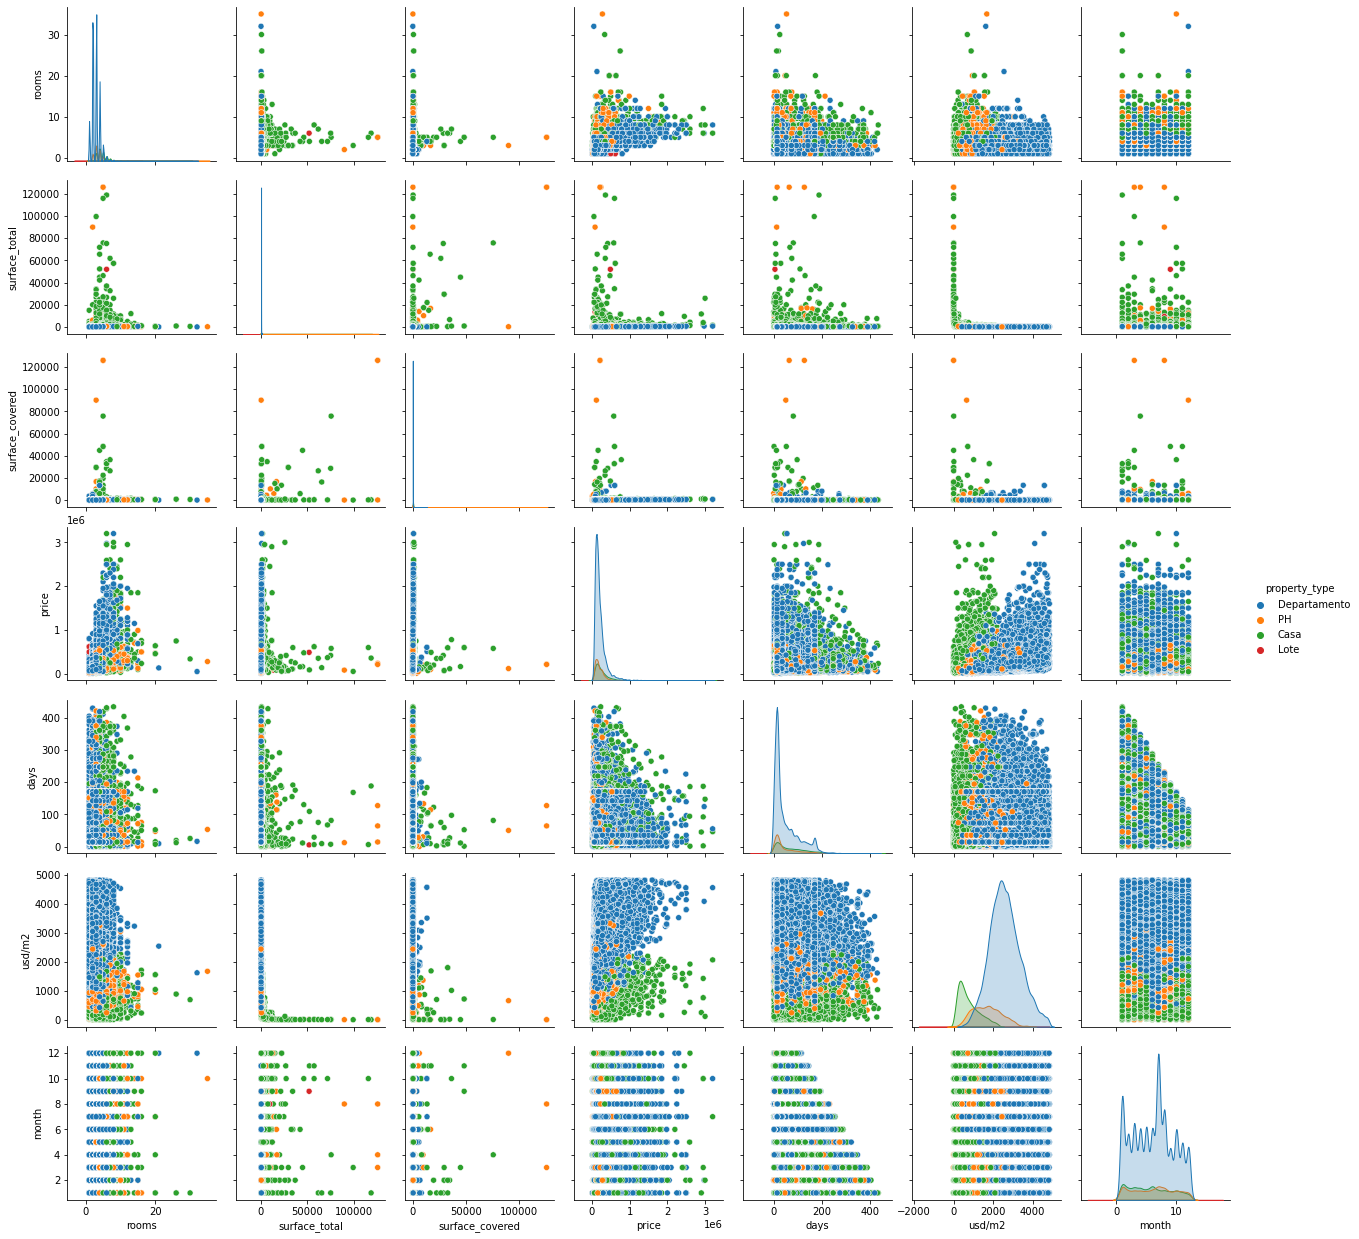

In [31]:
sns.pairplot(df_t3, hue="property_type")

Con los datos limpios procedemos a realizar el encoders de variables categoricas

In [32]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype 

# Transformamos L3

le = LabelEncoder()
le.fit(df_t3['l3'])
df_t3['l3'] = le.transform(df_t3['l3'])


# Realizamos columnas Dummy con el tipo de propiedad

df_t3["property_type"] = df_t3["property_type"].astype(CategoricalDtype(list(set(df_t3['property_type'].values))))

property_type_df = pd.get_dummies(df_t3["property_type"],prefix='property_type')

# Realizamos columnas Dummy con el lugar


df_t3["l2"] = df_t3["l2"].astype(CategoricalDtype(list(set(df_t3['l2'].values))))

l2_df = pd.get_dummies(df_t3["l2"],prefix='l2')


df_t3 = df_t3.drop(["l2"], axis = 1)
df_t3 = df_t3.drop(["property_type"], axis = 1)
df_t3 = pd.concat([df_t3, l2_df, property_type_df], axis = 1) 

df_t3.head()

,l3,rooms,surface_total,surface_covered,price,days,usd/m2,month,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Norte,l2_Capital Federal,l2_Bs.As. G.B.A. Zona Sur,property_type_Casa,property_type_Departamento,property_type_PH,property_type_Lote
0,63,7.0,140.0,140.0,153000.0,67,1092.86,10,0,0,1,0,0,1,0,0
1,11,2.0,70.0,58.0,159000.0,35,2271.43,10,0,0,1,0,0,0,1,0
2,48,2.0,45.0,45.0,125000.0,15,2777.78,10,0,0,1,0,0,0,1,0
3,48,2.0,85.0,50.0,295000.0,67,3470.59,10,0,0,1,0,0,0,1,0
4,33,2.0,50.0,35.0,40000.0,146,800.00,10,0,0,0,1,0,0,1,0


#### Partimos el dataset en train y test

In [33]:
data_train, data_test = train_test_split(df_t3, test_size = 0.3)

#### Escalamos los datos

In [34]:
df_features = data_train.drop(['days'], axis = 1)
data_train_scaler = StandardScaler().fit_transform(df_features.values)
data_train_scaler

array([[ 1.67112912,  0.65783088, -0.0533848 , ...,  0.56761063,
        -0.36541265, -0.01247606],
       [-0.34445191, -0.79837714, -0.10060454, ...,  0.56761063,
        -0.36541265, -0.01247606],
       [-1.56140649, -0.79837714, -0.10232162, ..., -1.76177108,
         2.73663216, -0.01247606],
       ...,
       [-1.37125734, -0.07027313, -0.06454583, ...,  0.56761063,
        -0.36541265, -0.01247606],
       [ 0.18796572, -1.52648115, -0.10060454, ...,  0.56761063,
        -0.36541265, -0.01247606],
       [ 1.25280098, -1.52648115, -0.12035097, ...,  0.56761063,
        -0.36541265, -0.01247606]])

In [35]:
df_features = data_test.drop(['days'], axis = 1)
data_test_scaler = StandardScaler().fit_transform(df_features.values)
data_test_scaler

array([[-1.55273051, -0.07094046, -0.05978056, ...,  0.56684343,
        -0.36532054, -0.01556102],
       [ 0.19359661, -0.07094046, -0.06539335, ...,  0.56684343,
        -0.36532054, -0.01556102],
       [-1.47680325,  0.6644104 ,  0.01529045, ...,  0.56684343,
        -0.36532054, -0.01556102],
       ...,
       [-0.71753059, -0.80629133, -0.07170773, ...,  0.56684343,
        -0.36532054, -0.01556102],
       [ 0.19359661, -1.54164219, -0.0857397 , ...,  0.56684343,
        -0.36532054, -0.01556102],
       [ 0.45934204, -0.07094046, -0.05557097, ...,  0.56684343,
        -0.36532054, -0.01556102]])

### 3. Modelo benchmark y optimización de hiperparametros

Vamos a utilizar como modelo Random Forest y vamos a evaluar el error con la metrica RMSE

In [36]:
from sklearn.ensemble import RandomForestRegressor

y_test = data_test["days"].values
y_train = data_train["days"].values
X_test = np.nan_to_num(data_test_scaler)
X_train = np.nan_to_num(data_train_scaler)

In [37]:
rt = RandomForestRegressor(n_jobs=-1)
rt.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [38]:
y_train_pred = rt.predict(X_train)
y_test_pred = rt.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error

rmse_train_sq = mean_squared_error(y_train, y_train_pred)
rmse_test_sq = mean_squared_error(y_test, y_test_pred)
print("El error de este modelo es de {} en entrenamiento y {} en testeo".format(rmse_train_sq, rmse_test_sq))

El error de este modelo es de 386.8174132641062 en entrenamiento y 2697.3657880763335 en testeo


C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


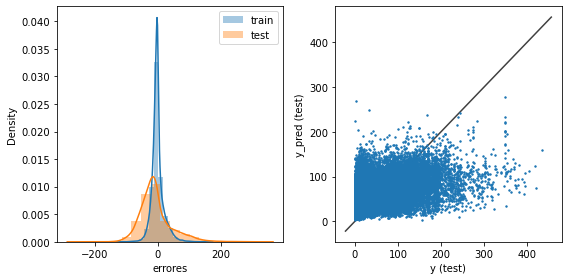

In [40]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Podemos ver que el modelo tiene un problema de sobreajuste ya que tiene un error muy bajo en el entrenamiento pero en el testeo su error es muy grande. Vamos a mejorar este aspecto con GridSearch

#### Optimizamos hiperparametros con GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'n_estimators': [50, 150, 300, 500],
    'max_depth': [4, 5, 10],
}

In [43]:
gb_cv = GridSearchCV(estimator=rt, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1)

In [44]:
gb_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 10],
                         'n_estimators': [50, 150, 300, 500]},
             scoring='neg_mean_absolute_error')

In [45]:
best_model = gb_cv.best_estimator_

In [46]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
print(f'El error RMSE medio en Train: {rmse_train}')
print(f'El error RMSE medio en Test: {rmse_test}')

El error RMSE medio en Train: 2289.3423112833243
El error RMSE medio en Test: 2564.630724722682


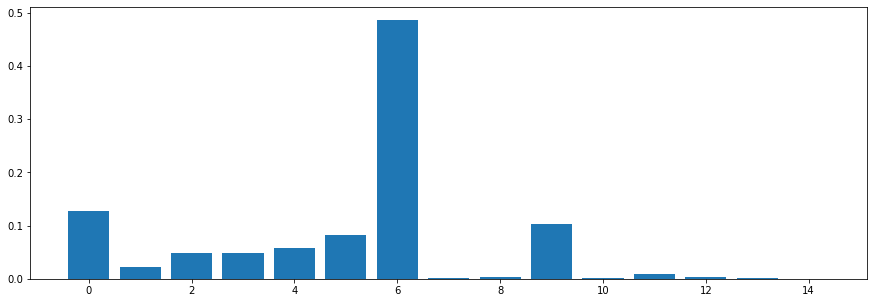

In [47]:
plt.figure(figsize=(15,5))
plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.show()

In [48]:
print("El atributo mas importante es: " + str(df_t3.columns[7]))
print("El segundo mas importante es: " + str(df_t3.columns[0]))
print("El tercero mas importante es: " + str(df_t3.columns[9]))
print("El cuarto mas importante es: " + str(df_t3.columns[6]))

El atributo mas importante es: month
El segundo mas importante es: l3
El tercero mas importante es: l2_Bs.As. G.B.A. Zona Norte
El cuarto mas importante es: usd/m2


### 4. Interpretación de los resultados

#### Sobre los resultados del modelo

Podemos apreciar que en la optimización de hiperparametros tenemos un modelo mejor ajustado con un error de 2300 a 2500 que en dias serian un aproximado de 50 dias. Considerando los valores y que aun existe datos atipicos, considero que es un buen desempeño.

De este modelo, lo mas interesante son las variables mas importantes que tomo:

* Month: Es la variable que mas influye, lo cual asegura que este tipo de negocio es estacional. Para determinar el tiempo que demorara en venderse la unidad, influye mas el cuando comienzo a vender que lo que estoy vendiendo en si mismo.
* Los siguientes 2 factores son una cuestión de ubicación, e influye mucho si es en capital federal.
* Por ultimo, el precio por m2 (que representa una relación de otras 2 variables), tambien forma parte de determinar el tiempo de venta.

Resumidamente, si tuviera que optimizar aspectos de un negocio inmobiliario Argentino ubicado en Buenos Aires, me esforzaria mas en hacer campañas en los meses claves, buscar buenas ubicaciones y mantener una buena relación de precio/m2.

#### Sobre el modelo

Como primera gran critica a este modelo, seria mucho mas optimo y real tener solo datos de unidades que se hayan vendido, ya que seguramente no todas las publicaciones finalizan por ventas. Este error no creo que influya demasiado en los resultados, pero podria mejorar el modelo si no estuviera.

Otro aspecto a mejorar es el plazo de las publicaciones ya que es a lo largo de un poco mas de 1 año, los resultados pueden estar afectados por situaciones unicas de el periodo analizado. Seria mejor tener datos de varios años para determinar mejor el comportamiento

